
# 🔎 Mini Project (≤ 1 hour): SMS Spam Detector

**Goal:** Build a tiny AI model that classifies SMS messages as **spam** or **ham** (not spam).  
No prior AI/cybersecurity experience required — just run the cells top-to-bottom in **Google Colab**.

**What you'll do:**
1. Load a small public SMS dataset.
2. Train a text classifier with a few lines of code.
3. See accuracy + a quick bar chart.
4. Test it with your own messages.

> Why this project? It's a practical, bite-sized introduction to AI for security (spam filtering), **finishable in under an hour**, and easy to extend if you’re curious.



## ✅ Setup (Colab friendly)

Run this cell to import the libraries we need.


In [1]:

# If you're on Colab, these are usually already installed.
# If any import fails, uncomment the pip lines below to install.
# !pip install -q scikit-learn pandas matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



## 📥 Load the dataset

We'll use a small, well-known SMS dataset (labels: `ham` or `spam`).  
The file is hosted on GitHub and loads directly in Colab.


In [2]:
# Dataset URL (tab-separated with columns: label, message)
DATA_URL = "https://raw.githubusercontent.com/utsav-195/sms-spam-ham-classification/main/data/SMSSpamCollection"

# Load the dataset properly
df = pd.read_csv(
    DATA_URL,
    sep='\t',             # tab-separated values
    header=None,           # no header row in file
    names=['label', 'message'],  # assign column names
    encoding='utf-8'       # robust text decoding
)

print("✅ Dataset loaded successfully!")
print(df.head())
print(f"\nTotal messages: {len(df)}")
print(df['label'].value_counts())

✅ Dataset loaded successfully!
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

Total messages: 5572
label
ham     4825
spam     747
Name: count, dtype: int64



## ✂️ Train / Test split

We'll train on 80% of the data and test on 20%.


In [3]:

X_train, X_test, y_train, y_test = train_test_split(
    df['message'], df['label'], test_size=0.2, random_state=42, stratify=df['label']
)

print(f"Train size: {X_train.shape[0]} \nTest size: {X_test.shape[0]}")
y_train.value_counts()


Train size: 4457 
Test size: 1115


,count
label,
ham,3859
spam,598



## 🤖 Build & train the model

We'll use a simple Pipeline: **TfidfVectorizer** (turns text into numbers) + **LogisticRegression** (classifier).


In [4]:
model = Pipeline([
    ('tfidf', TfidfVectorizer(
        stop_words='english',
        lowercase=True,
        ngram_range=(1,2),      # include unigrams + bigrams (captures 'click here', 'free iphone')
        strip_accents='unicode' # normalize accents
    )),
    ('clf', LogisticRegression(
        max_iter=1000,
        class_weight='balanced', # handle class imbalance
        solver='liblinear'       # robust for small/medium text problems
    ))
])

history = None  # (for compatibility with accuracy plotting templates)
model.fit(X_train, y_train)
print("✅ Training complete.")

✅ Training complete.



## 📊 Accuracy & quick report

We’ll compute accuracy on the test set and show a tiny bar chart (Train vs Test if both are available).


Training accuracy: 0.9980
Test accuracy:     0.9767

Classification report (test):

              precision    recall  f1-score   support

         ham       0.99      0.98      0.99       966
        spam       0.90      0.93      0.91       149

    accuracy                           0.98      1115
   macro avg       0.95      0.96      0.95      1115
weighted avg       0.98      0.98      0.98      1115



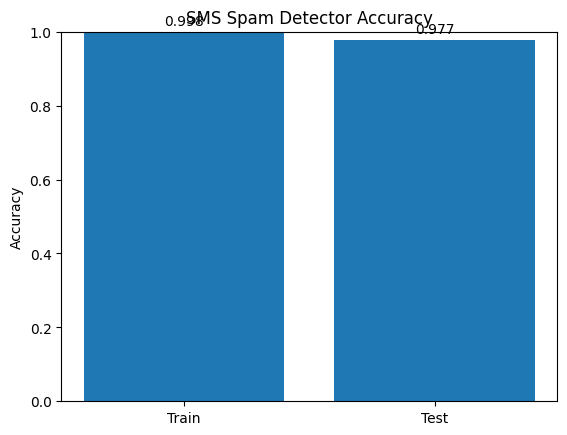

In [5]:

# Predict and evaluate
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print(f"Training accuracy: {train_acc:.4f}")
print(f"Test accuracy:     {test_acc:.4f}\n")

print("Classification report (test):\n")
print(classification_report(y_test, y_pred_test))

# Quick bar chart
labels = ["Train", "Test"]
values = [train_acc, test_acc]

plt.figure()
plt.bar(labels, values)
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("SMS Spam Detector Accuracy")
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f"{v:.3f}", ha="center")
plt.show()



## 🧪 Try your own messages

Type an SMS and see whether the model thinks it's spam or ham.


In [6]:

your_messages = [
    "WIN a free iPhone now!!! Click here: http://spam.link",
    "Hey, are we still meeting at 5?",
    # 👉 Add your own examples below:
]

preds = model.predict(your_messages)
for msg, label in zip(your_messages, preds):
    print(f"[{label.upper()}] {msg}")


[SPAM] WIN a free iPhone now!!! Click here: http://spam.link
[HAM] Hey, are we still meeting at 5?


In [7]:
# 🔎 Sanity check: predictions + probabilities for two examples
example_msgs = [
    "WIN a free iPhone now!!! Click here: http://spam.link",
    "Hey, are we still meeting at 5?"
]
preds = model.predict(example_msgs)

# If classifier supports probabilities, show them
proba_supported = hasattr(model.named_steps['clf'], "predict_proba")
if proba_supported:
    probs = model.predict_proba(example_msgs)
    for msg, label, pr in zip(example_msgs, preds, probs):
        p_spam = pr[list(model.classes_).index('spam')]
        print(f"[{label.upper()}] p(spam)={p_spam:.3f} :: {msg}")
else:
    for msg, label in zip(example_msgs, preds):
        print(f"[{label.upper()}] :: {msg}")

[SPAM] p(spam)=0.790 :: WIN a free iPhone now!!! Click here: http://spam.link
[HAM] p(spam)=0.073 :: Hey, are we still meeting at 5?



## 🌟 (Optional) Two quick experiments

These are **optional** and safe to skip. They add ~5 minutes if you're curious.

### A) Different model
Switch `LogisticRegression` to a **LinearSVC** (often strong for text).

### B) Minimal preprocessing
Try changing `TfidfVectorizer` arguments, e.g., `ngram_range=(1,2)` to include word pairs.


In [8]:

# === OPTIONAL: Try a different estimator or TF-IDF settings ===
# Uncomment to experiment:

# from sklearn.svm import LinearSVC
# model_alt = Pipeline([
#     ('tfidf', TfidfVectorizer(stop_words='english', ngram_range=(1,2))),
#     ('clf', LinearSVC())
# ])
# model_alt.fit(X_train, y_train)
# alt_acc = accuracy_score(y_test, model_alt.predict(X_test))
# print(f"Test accuracy with LinearSVC + bigrams: {alt_acc:.4f}")


Test accuracy with LinearSVC + bigrams: 0.9830



## ✅ What to submit

1. **A screenshot** of your accuracy bar chart.
2. **Two example messages** you tested and the model's predictions.
3. *(Optional)* A short note if you tried the optional experiment and whether accuracy changed.

---

### 🎯 Learning outcomes (in plain words)
- You ran a **complete AI workflow**: load data → train → evaluate → test.
- You saw how **text becomes numbers** with TF-IDF.
- You connected AI to **security** with a practical spam filter example.

> That's it! Great job — you just trained and evaluated a working AI model in minutes.


# 🧩 Mini Project Reflection — SMS Spam Detector


1. Understanding the purpose

👉 What was the main goal of this mini project, and how does it relate to cybersecurity in everyday life?

Answer:

2. Dataset awareness

👉 Where did our SMS data come from, and what two types of messages did we train the AI to recognize?

Answer:

3. The AI pipeline

👉 In your own words, what happens when the AI “learns” — what did the model do with the SMS messages during training?

Answer:


4. Real-world connection

👉 Can you name one example of where a spam or phishing filter like this might be used in real life (outside this project)?

Answer:

5. Interpreting results

👉 When you tested your own messages, how did the AI decide between spam and ham?

(What clues in the message might have influenced the AI’s prediction?)

Answer:

6. Reflection & curiosity

👉 If you could improve this small spam detector, what’s one idea you’d add — maybe using more data, smarter filtering, or catching new types of spam?

Answer: